# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{lat_lngs[i][0]}&lon={lat_lngs[i][1]}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found or error occurred: {e}. Skipping...")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Check if city_data is populated
print(f"Number of records retrieved: {len(city_data)}")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
{'coord': {'lon': 67.171, 'lat': -81.1629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 216.65, 'feels_like': 209.65, 'temp_min': 216.65, 'temp_max': 216.65, 'pressure': 1068, 'humidity': 100, 'sea_level': 1068, 'grnd_level': 595}, 'visibility': 10000, 'wind': {'speed': 6.53, 'deg': 91, 'gust': 10.5}, 'clouds': {'all': 90}, 'dt': 1719668261, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
City not found or error occurred: 'country'. Skipping...
Processing Record 2 of Set 1 | hamilton
{'coord': {'lon': -65.3865, 'lat': 30.2699}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.85, 'feels_like': 299.54, 'temp_min': 298.85, 'temp_max': 298.85, 'pressure': 1024, 'humidity': 79, 'sea

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
Country       155
Date          155
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.9876,-52.3907,276.73,90,100,7.64,GL,1719668267
1,jamestown,66.7768,151.4367,282.52,80,100,2.82,RU,1719668305
2,puerto natales,-16.4042,-6.3494,293.84,71,40,6.50,SH,1719668307
3,bredasdorp,50.2266,72.6584,297.55,36,6,2.99,KZ,1719668313
4,hithadhoo,60.9053,-92.5890,275.71,84,23,3.42,CA,1719668325


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.9876,-52.3907,276.73,90,100,7.64,GL,1719668267
1,jamestown,66.7768,151.4367,282.52,80,100,2.82,RU,1719668305
2,puerto natales,-16.4042,-6.3494,293.84,71,40,6.50,SH,1719668307
3,bredasdorp,50.2266,72.6584,297.55,36,6,2.99,KZ,1719668313
4,hithadhoo,60.9053,-92.5890,275.71,84,23,3.42,CA,1719668325


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

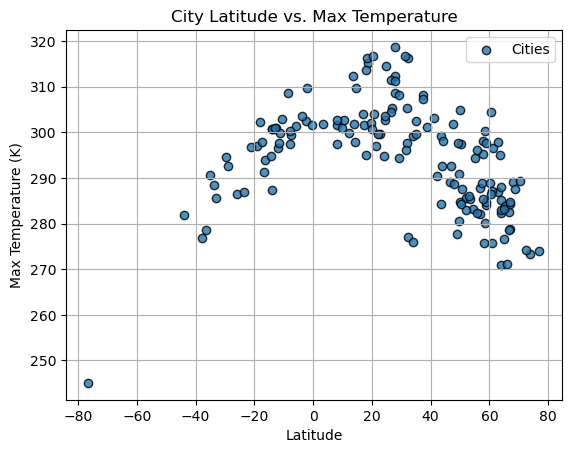

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

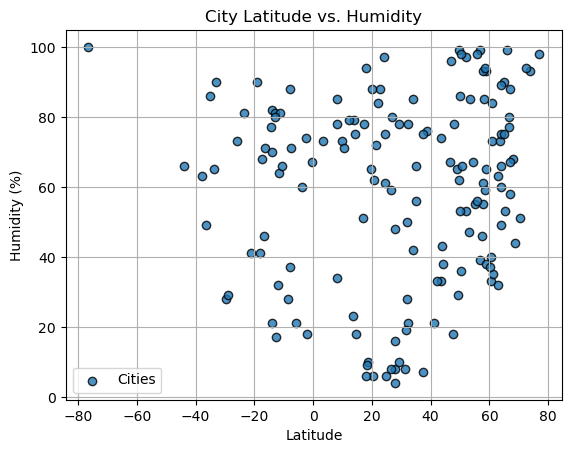

In [20]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

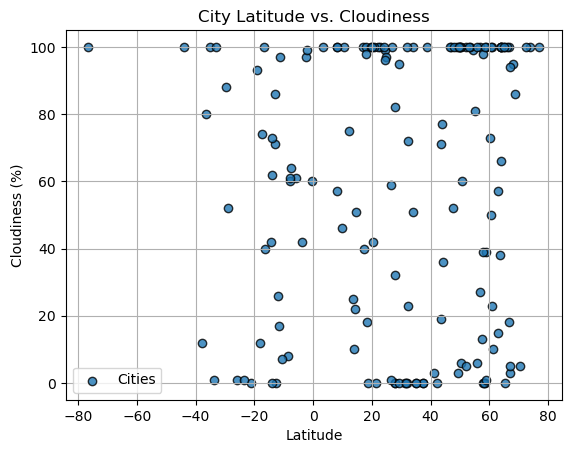

In [21]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

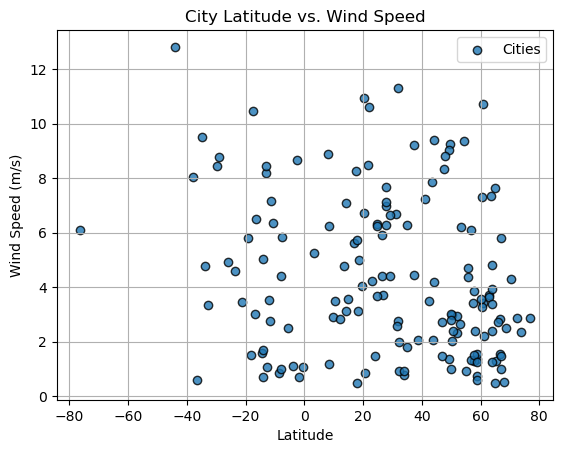

In [22]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_file):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line
    regression_line = slope * np.array(x_values) + intercept
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")
    
    # Plot the regression line
    plt.plot(x_values, regression_line, "r-", label=f"Linear Regression (R^2 = {r_value**2:.2f})")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.9876,-52.3907,276.73,90,100,7.64,GL,1719668267
1,jamestown,66.7768,151.4367,282.52,80,100,2.82,RU,1719668305
3,bredasdorp,50.2266,72.6584,297.55,36,6,2.99,KZ,1719668313
4,hithadhoo,60.9053,-92.5890,275.71,84,23,3.42,CA,1719668325
6,vilyuchinsk,33.8568,-105.0383,299.17,42,100,0.77,US,1719668336


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,puerto natales,-16.4042,-6.3494,293.84,71,40,6.50,SH,1719668307
5,fuvahmulah,-12.0900,31.1438,296.68,32,26,3.54,ZM,1719668327
11,akureyri,-19.0811,-174.6211,296.93,90,93,5.79,TO,1719668356
12,dudinka,-5.6877,33.7250,301.50,21,61,2.49,TZ,1719668358
13,ta`u,-14.0423,-173.6815,300.77,82,62,5.03,WS,1719668360


###  Temperature vs. Latitude Linear Regression Plot

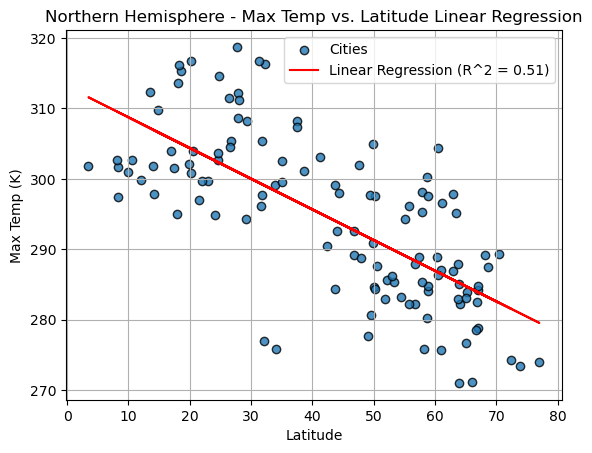

In [32]:
# Linear regression on Northern Hemisphere - Latitude vs. Max Temperature
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temp (K)',
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'output_data/Northern_Hemi_MaxTemp_vs_Latitude.png')


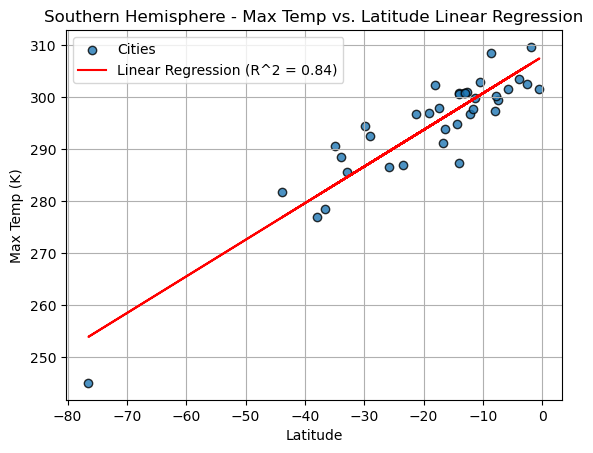

In [33]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temp (K)',
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'output_data/Southern_Hemi_MaxTemp_vs_Latitude.png')

**Discussion about the linear relationship:** 
Northern Hemisphere
Latitude and maximum temperature have an inverse relationship: as latitude increases (moving towards the poles), maximum temperature decreases. This is due to less solar radiation at higher latitudes.

Southern Hemisphere
Similarly, in the Southern Hemisphere, maximum temperature decreases as latitude increases, showing the same inverse relationship. This pattern is also due to the reduction in solar radiation at higher latitudes.

### Humidity vs. Latitude Linear Regression Plot

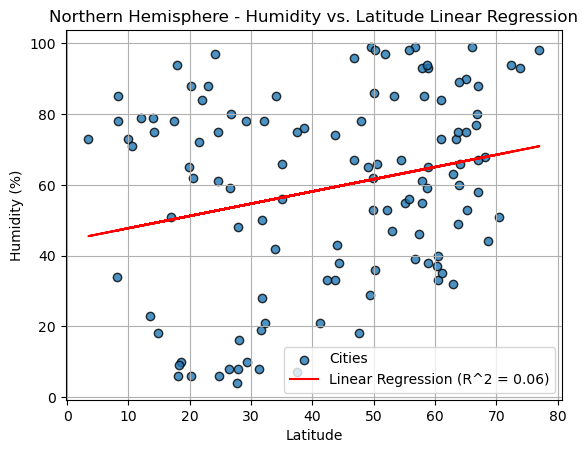

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'output_data/Northern_Hemi_Humidity_vs_Latitude.png')

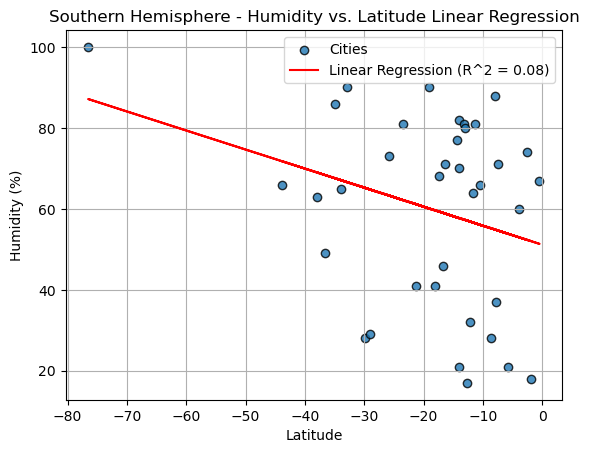

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'output_data/Southern_Hemi_Humidity_vs_Latitude.png')

**Discussion about the linear relationship:** 
Northern Hemisphere
In the Northern Hemisphere, the regression plot shows a slight increase in humidity as latitude increases. This suggests a weak positive correlation where higher latitudes may experience slightly higher humidity levels, possibly due to cooler temperatures and increased precipitation.

Southern Hemisphere
Similarly, in the Southern Hemisphere, the regression plot indicates increase in humidity with increasing latitude. This positive correlation might be influenced by regional climatic conditions and oceanic effects that contribute to higher humidity at higher latitudes.







### Cloudiness vs. Latitude Linear Regression Plot

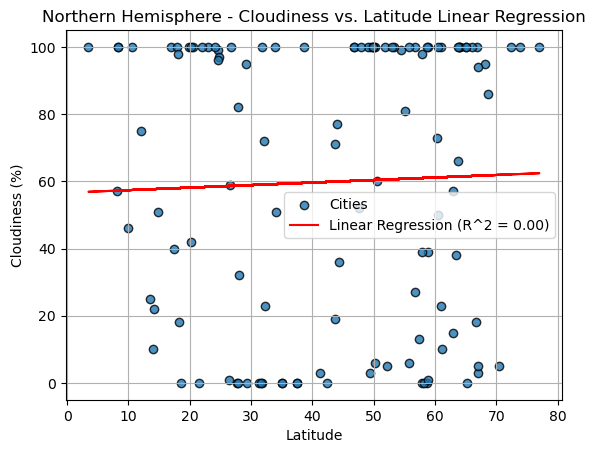

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'output_data/Northern_Hemi_Cloudiness_vs_Latitude.png')

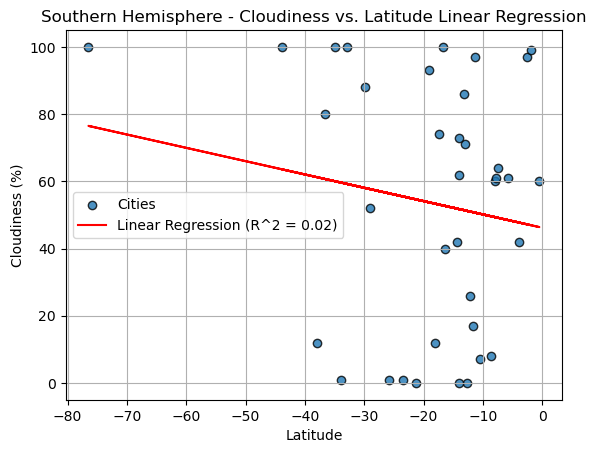

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'output_data/Southern_Hemi_Cloudiness_vs_Latitude.png')


**Discussion about the linear relationship:** 

Northern Hemisphere
The graph shows that cloudiness doesn't change much as you move from the equator to higher latitudes. This means latitude doesn't strongly affect how cloudy it is.

Southern Hamisphere
There's a noticeable trend where cloudiness tends to decrease as you move closer to the equator (latitude approaching zero). This means areas near the equator generally experience less cloud cover compared to regions further south.

### Wind Speed vs. Latitude Linear Regression Plot

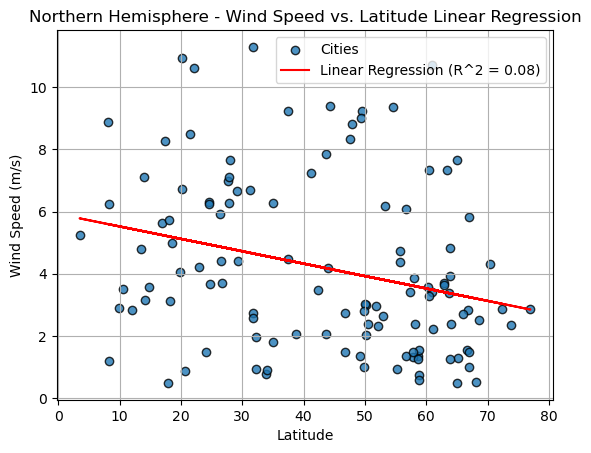

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'output_data/Northern_Hemi_WindSpeed_vs_Latitude.png')

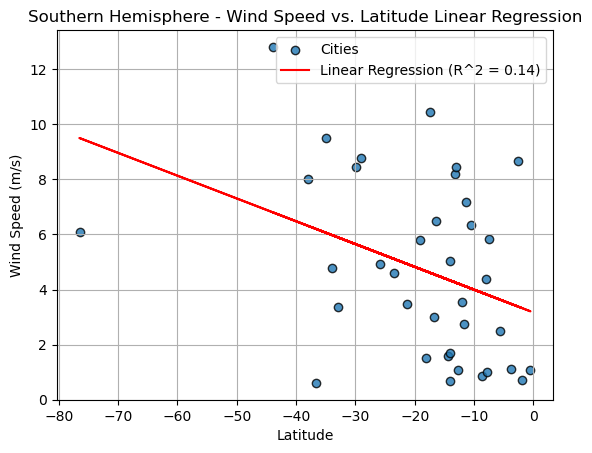

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'output_data/Southern_Hemi_WindSpeed_vs_Latitude.png')

**Discussion about the linear relationship:** 

Northern Hemisphere
the plot shows a slight relationship between latitude and wind speed. This means that as it moves away from the equator towards higher latitudes, there is a small increase in wind speed. However, the correlation is not strong, indicating that latitude alone may not be the primary factor influencing wind speed variation in this region.

Southern Hamisphere
there is a strong positive relationship between latitude and wind speed. As latitude approaches zero (closer to the equator), wind speeds tend to decrease noticeably. This indicates that latitude is a significant factor influencing wind speed variations in this region.








